Found 40079 files belonging to 10 classes.
Found 9921 files belonging to 10 classes.
Epoch 1/10


c:\Users\skshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1253/1253 ━━━━━━━━━━━━━━━━━━━━ 46s 36ms/step - accuracy: 0.2673 - loss: 2.0119 - val_accuracy: 0.3480 - val_loss: 1.7977
Epoch 2/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3871 - loss: 1.7377 - val_accuracy: 0.3582 - val_loss: 1.8266
Epoch 3/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4195 - loss: 1.6417 - val_accuracy: 0.4031 - val_loss: 1.6573
Epoch 4/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4413 - loss: 1.5772 - val_accuracy: 0.4314 - val_loss: 1.6059
Epoch 5/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4599 - loss: 1.5255 - val_accuracy: 0.4070 - val_loss: 1.6483
Epoch 6/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4752 - loss: 1.4819 - val_accuracy: 0.4157 - val_loss: 1.6507
Epoch 7/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4888 - loss: 1.4387 - val_accuracy: 0.4204 - val_loss: 1.6331
Epoch 8/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5017 - loss: 1.41

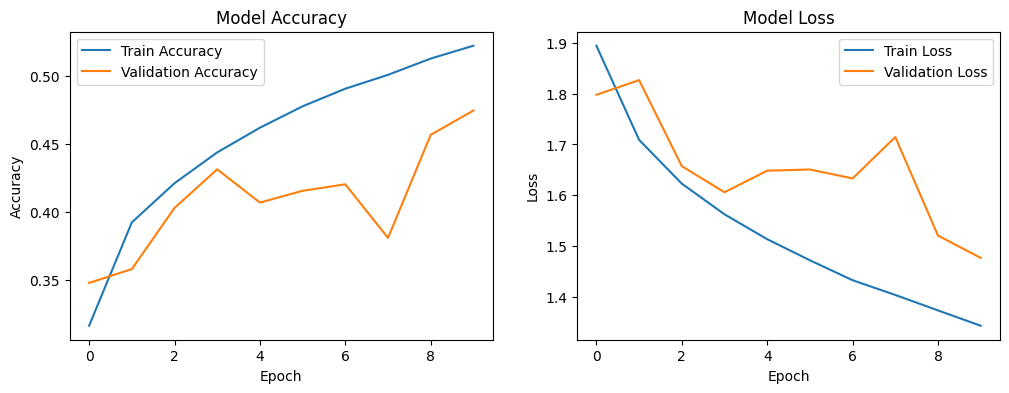

In [1]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define image parameters
IMG_HEIGHT, IMG_WIDTH = 32, 32
BATCH_SIZE = 32

# b. Load the training and testing data using Keras image data generators
train_data_dir = "cifar-10-img/train"
test_data_dir = "cifar-10-img/test"

# Load training data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    label_mode='int',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Load testing data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    label_mode='int',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Normalize the data to range [0, 1]
normalization_layer = layers.Rescaling(1.0 / 255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Flattening the images to 1D array
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# d. Train the model using SGD
history = model.fit(train_data, epochs=10, validation_data=test_data)

# e. Evaluate the network
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.4f}")

# f. Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
